In [2]:
#BOSTON HOUSE DATA SET
from sklearn.datasets import load_boston

In [3]:
boston=load_boston() 

X=boston.data        #features data set
y=boston.target      #output/price matrix


In [4]:
print(X.shape)    #506 examples
print(y.shape)

(506, 13)
(506,)


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#view data with panda's data frame
import pandas as pd
df=pd.DataFrame(X)
df.columns=boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#normalise this data set
import numpy as np

u=np.mean(X,axis=0)   
std=np.std(X,axis=0)  
#print(u.shape,std.shape)

X=(X-u)/std
pd.DataFrame(X[:5,:]).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [8]:
#adding 1 in matrix for convetion(required for implementing formula)
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape) 
print(X[:4,:4])

(506, 14)
[[ 1.         -0.41978194  0.28482986 -1.2879095 ]
 [ 1.         -0.41733926 -0.48772236 -0.59338101]
 [ 1.         -0.41734159 -0.48772236 -0.59338101]
 [ 1.         -0.41675042 -0.48772236 -1.30687771]]


In [9]:
#implementing optimized code for linear regression for multiple features
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    m=X.shape[0]
    e=0.0
    y_=hypothesis(X,theta)
    e=np.sum((y_-y)**2)
    
    return e/m

def gradient(X,y,theta):
    y_=hypothesis(X,theta)
    grad=np.dot(X.T,(y_-y))
    m=X.shape[0]
    
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_iters=300):
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    
    for i in range(max_iters):
        e=error(X,y,theta)
        error_list.append(e)
    
        #gradient descent
        grad=gradient(X,y,theta)
        theta=theta-learning_rate * grad
    
    return theta,error_list
    

In [10]:
#training
theta,error_list=gradient_descent(X,y)

In [11]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

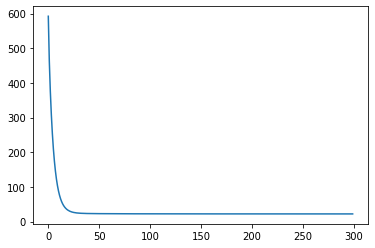

In [14]:
#visualizing error reduction
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()


In [15]:
#predictions
y_=hypothesis(X,theta)
print(y_.shape)

(506,)


In [17]:
#to check accuracy percentage
def score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score=(1-num/denom)
    return score*100
score(y,y_)

74.04541323942743